# About Dataset

### Extraction was done by Barry Becker from the 1994 Census database.
### Prediction task is to determine whether a person makes over 50K a year.

Columns are:
* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* salary: <=50K or >50K

Source: https://archive.ics.uci.edu/ml/datasets/Census+Income

Thumbnail: https://www.deskera.com/blog/net-salary/

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [115]:
df = pd.read_csv('C:\\Users\\henri/salary.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df['age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

In [7]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [8]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [9]:
df[df['workclass']==' ?']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [10]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [11]:
df['occupation'].value_counts() # podemos ver que muitas pessoas com '?' na feature occupation também têm '?' na feature workclass

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [116]:
df['workclass'] = df['workclass'].apply(lambda x: x[1:]) # tirando o espaço em branco no início das palavras

In [117]:
df['workclass'] = df['workclass'].replace('?',np.nan)

In [118]:
# faça o mesmo para occupation
df['occupation'] = df['occupation'].apply(lambda x: x[1:])

In [119]:
df['occupation'] = df['occupation'].replace('?',np.nan)

In [34]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [120]:
df['education'] = df['education'].apply(lambda x: x[1:])

In [40]:
df['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [48]:
df['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [121]:
df['marital-status'] = df['marital-status'].apply(lambda x: x[1:])

In [50]:
df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [52]:
df['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [122]:
df['relationship'] = df['relationship'].apply(lambda x: x[1:])

In [54]:
df['relationship'].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [57]:
df['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [123]:
df['race'] = df['race'].apply(lambda x: x[1:])

In [124]:
df['sex'] = df['sex'].apply(lambda x: x[1:])

In [62]:
df['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [67]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [125]:
df['native-country'] = df['native-country'].apply(lambda x: x[1:])

In [126]:
df['native-country'] = df['native-country'].replace('?',np.nan)

In [72]:
df['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [127]:
df['salary'] = df['salary'].apply(lambda x: x[1:])

In [74]:
# vamos ver quantas linhas faltando informação existem
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [128]:
# agora removemos os valores NaN, pois são poucos comparado com o total de dados
df = df.dropna()

In [129]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

# EDA

In [130]:
# primeiro vamos transformar as features categóricas em numéricas

In [131]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  salary          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [134]:
df = pd.get_dummies(data=df,columns=['workclass','education','marital-status','occupation','relationship','race','sex','salary'],
                    drop_first=True)

In [135]:
df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,native-country,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,salary_>50K
0,39,77516,13,2174,0,40,United-States,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,50,83311,13,0,0,13,United-States,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,38,215646,9,0,0,40,United-States,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,53,234721,7,0,0,40,United-States,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,Cuba,0,1,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,United-States,0,1,0,...,0,0,0,1,0,0,0,1,0,0
32557,40,154374,9,0,0,40,United-States,0,1,0,...,0,0,0,0,0,0,0,1,1,1
32558,58,151910,9,0,0,40,United-States,0,1,0,...,0,0,1,0,0,0,0,1,0,0
32559,22,201490,9,0,0,20,United-States,0,1,0,...,0,1,0,0,0,0,0,1,1,0


In [262]:
df.corr()['salary_>50K'].sort_values()[0:-1]

marital-status_Never-married        -0.320053
relationship_Own-child              -0.226186
relationship_Not-in-family          -0.193258
occupation_Other-service            -0.165934
relationship_Unmarried              -0.145799
                                       ...   
capital-gain                         0.221196
hours-per-week                       0.229480
age                                  0.241998
education-num                        0.335286
marital-status_Married-civ-spouse    0.445418
Name: salary_>50K, Length: 96, dtype: float64

**Vemos que algumas features dizem bastante sobre o salário da pessoa ser maior ou não que 50K.
Se a pessoa tiver um cônjuge civil ('marital-status_Married-civ-spouse'), há uma grande possibilidade do salário
dela ser alto.
Outras features como age, hours-per-week, capital-gain, occupation (dependendo de qual for), também determinam o valor recebido
pela pessoa.
Vemos que a feature sex_Male tem uma correlação de 0.21  com o salário ser > 50K, mostrando que o empregado pode receber menos
do que devia apenas por ser mulher.
Olhando race_White e race_Black, vemos que a pessoa ser branca ou preta tem alguma influência em seu salário.
Ser preto mostra uma correlação negativa de 0.088 com o salário da pessoa ser < 50K**

<AxesSubplot:>

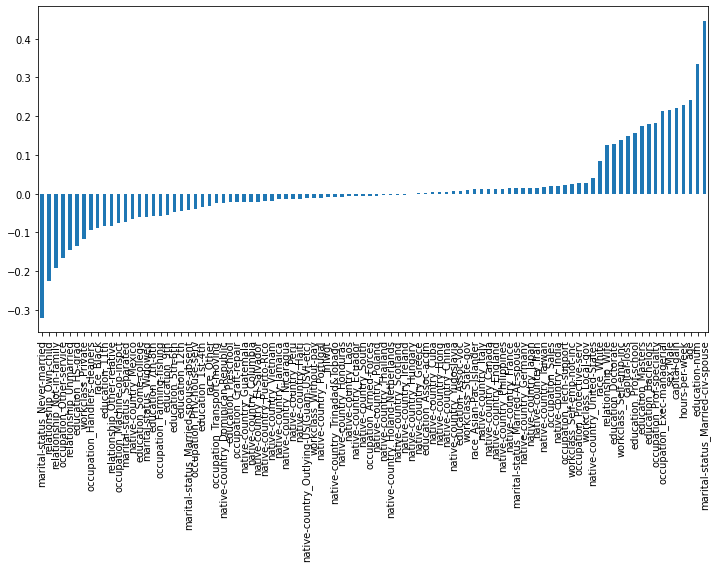

In [266]:
plt.figure(figsize=(12,6))
df.corr()['salary_>50K'].sort_values()[0:-1].plot(kind='bar')

<AxesSubplot:xlabel='sex_Male', ylabel='count'>

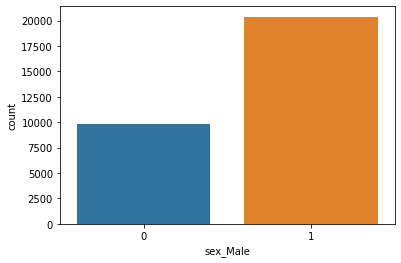

In [114]:
sns.countplot(data=df,x='sex_Male') # há mais homens do que mulheres nos dados

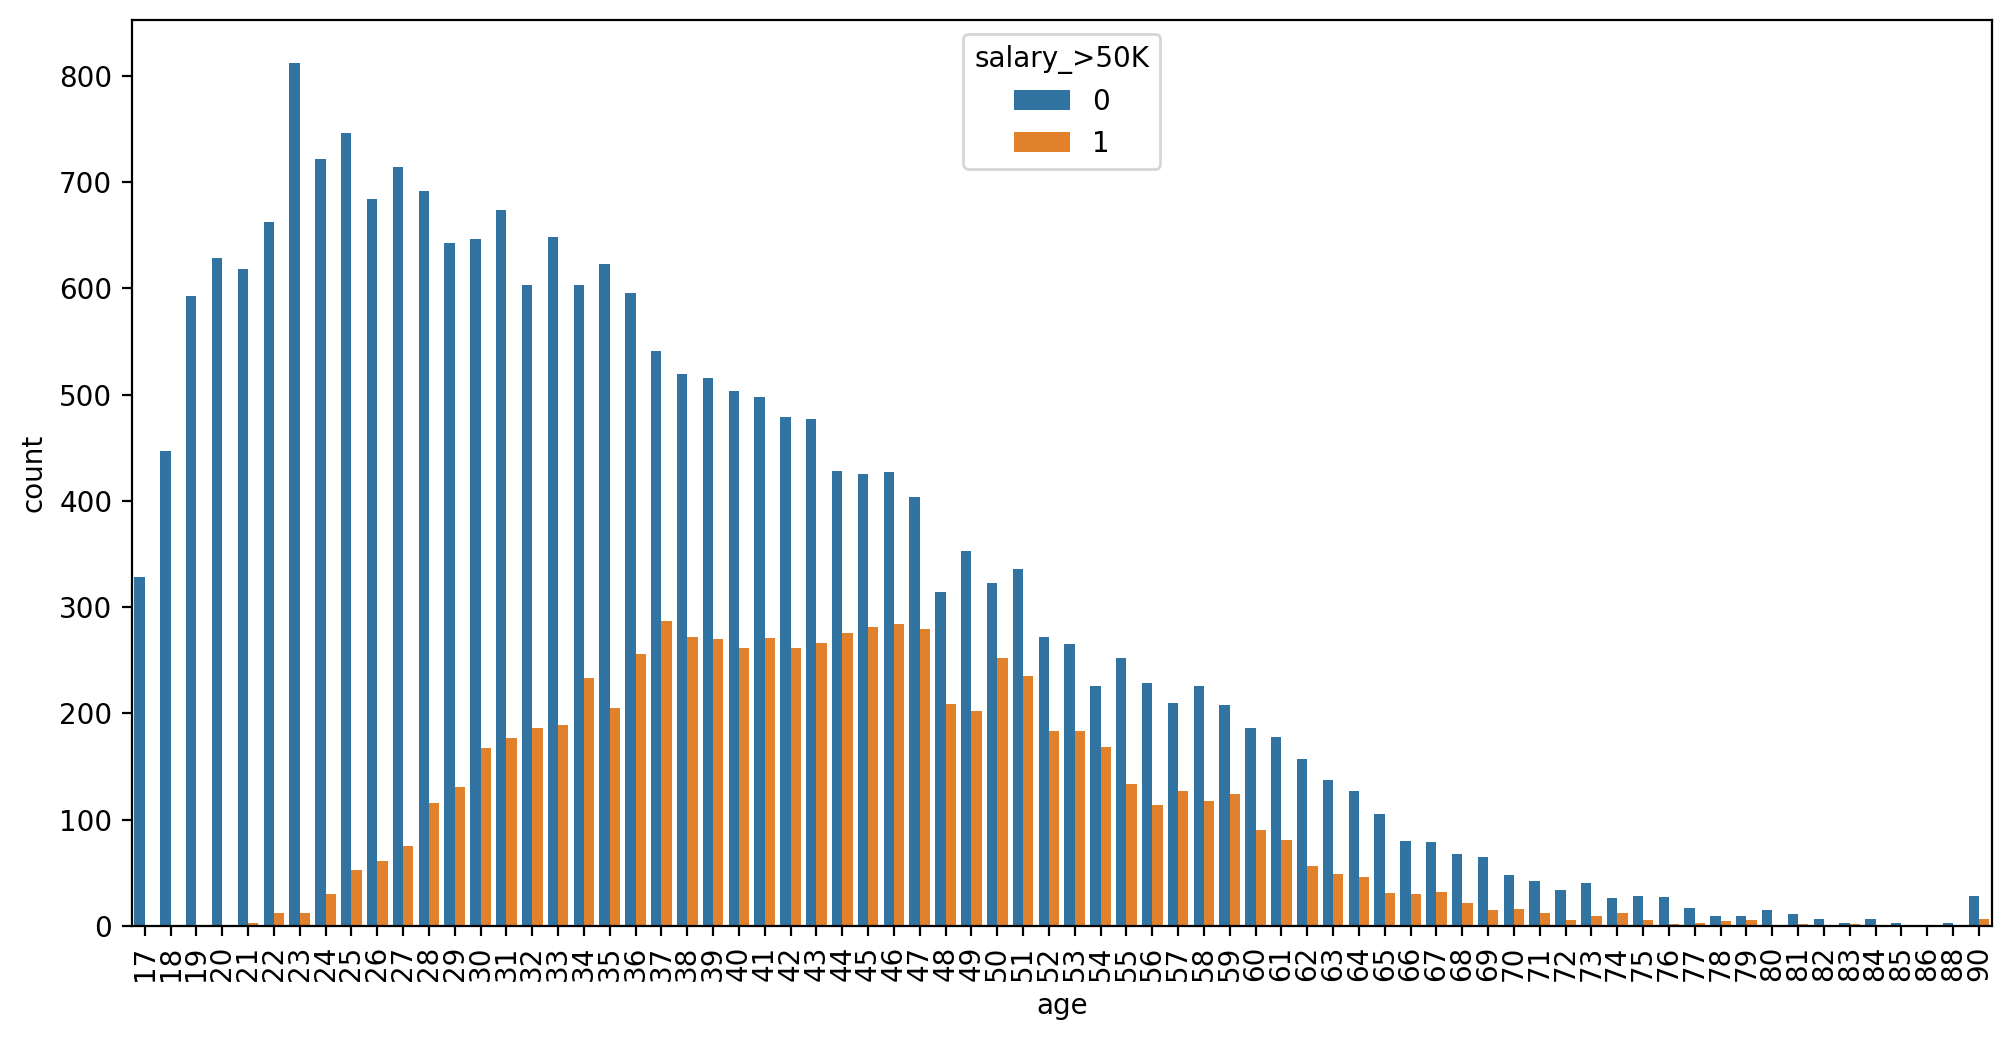

In [227]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='age',hue='salary_>50K')
plt.xticks(rotation=90);

# Building model and model evaluation

In [142]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
from sklearn.model_selection import train_test_split

In [229]:
df_2 = df # reserva

In [233]:
df = pd.get_dummies(data=df_2,columns=['native-country'],drop_first=True)

In [238]:
#df['salary_>50K']

In [239]:
X = df.drop('salary_>50K',axis=1)

In [240]:
y = df['salary_>50K']

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [247]:
from sklearn.model_selection import GridSearchCV

In [252]:
n_estimators = [5,10,15,20]
max_features= ['sqrt','log2']
criterion = ['gini','entropy']


param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'criterion':criterion}

In [253]:
rand_forest = RandomForestClassifier(random_state=42)

In [254]:
grid_model = GridSearchCV(estimator=rand_forest,param_grid=param_grid)

In [255]:
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [5, 10, 15, 20]})

In [256]:
grid_model.best_estimator_

RandomForestClassifier(max_features='sqrt', n_estimators=20, random_state=42)

In [257]:
better_model = RandomForestClassifier(n_estimators=20,max_features='sqrt',random_state=20)

In [258]:
better_model.fit(X_train,y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=20, random_state=20)

In [259]:
forst_preds = better_model.predict(X_test)

In [260]:
forst_preds

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [198]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [261]:
print(classification_report(y_test,forst_preds))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6767
           1       0.74      0.62      0.67      2282

    accuracy                           0.85      9049
   macro avg       0.81      0.77      0.79      9049
weighted avg       0.84      0.85      0.84      9049



In [265]:
confusion_matrix(y_test,forst_preds)

array([[6264,  503],
       [ 870, 1412]], dtype=int64)

In [272]:
test_1 = X_test.iloc[89].values

In [278]:
test_1 = test_1.reshape(1,96)

In [279]:
better_model.predict(test_1)

C:\Users\henri\anaconda3\envs\new_requirements1\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0], dtype=uint8)

In [281]:
y_test.iloc[89] # o modelo previu de forma correta com os dados de teste

0

In [286]:
test_2 = X_test.iloc[0].values.reshape(1,96)

In [287]:
better_model.predict(test_2)

C:\Users\henri\anaconda3\envs\new_requirements1\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0], dtype=uint8)

In [289]:
y_test.iloc[0] # aqui o modelo previu de forma errada

1

In [291]:
forst_preds

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [292]:
y_test

234      1
26879    0
19182    1
13485    0
9625     0
        ..
22583    0
32131    1
24450    1
8389     0
4235     0
Name: salary_>50K, Length: 9049, dtype: uint8

In [200]:
# elbow method
err = []

for i in range(1,101):
    model = RandomForestClassifier(n_estimators=i)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err.append(1-accuracy_score(preds,y_test))

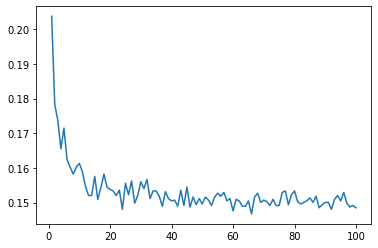

In [201]:
plt.plot(range(1,101),err)

In [293]:
from sklearn.preprocessing import MinMaxScaler

In [294]:
scaler = MinMaxScaler()

In [295]:
scaled_x_train = scaler.fit_transform(X_train)

In [296]:
scaled_x_test = scaler.transform(X_test)

In [298]:
from tensorflow.keras.models import Sequential

In [299]:
from tensorflow.keras.layers import Dense,Dropout

In [300]:
neural_model = Sequential()

neural_model.add(Dense(64,activation='relu'))
neural_model.add(Dropout(0.2))

neural_model.add(Dense(32,activation='relu'))
neural_model.add(Dropout(0.2))

neural_model.add(Dense(1,activation='sigmoid'))

neural_model.compile(loss='binary_crossentropy',optimizer='adam')


In [301]:
from tensorflow.keras.callbacks import EarlyStopping

In [303]:
early_stop = EarlyStopping(monitor='val_loss',verbose=1,patience=1)

In [304]:
neural_model.fit(scaled_x_train,y_train,epochs=20,validation_data=(scaled_x_test,y_test),
                callbacks=[early_stop])

Epoch 1/20
660/660 [==============================] - 2s 4ms/step - loss: 0.3961 - val_loss: 0.3557
Epoch 2/20
660/660 [==============================] - 2s 3ms/step - loss: 0.3553 - val_loss: 0.3452
Epoch 3/20
660/660 [==============================] - 2s 3ms/step - loss: 0.3455 - val_loss: 0.3393
Epoch 4/20
660/660 [==============================] - 2s 3ms/step - loss: 0.3355 - val_loss: 0.3356
Epoch 5/20
660/660 [==============================] - 2s 3ms/step - loss: 0.3301 - val_loss: 0.3347
Epoch 6/20
660/660 [==============================] - 2s 3ms/step - loss: 0.3239 - val_loss: 0.3282
Epoch 7/20
660/660 [==============================] - 2s 3ms/step - loss: 0.3200 - val_loss: 0.3298
Epoch 00007: early stopping


<AxesSubplot:>

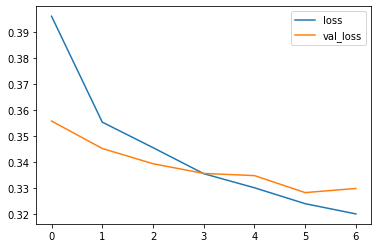

In [305]:
pd.DataFrame(neural_model.history.history).plot()

In [307]:
neural_preds = (neural_model.predict(scaled_x_test) > 0.5).astype("int32")

In [308]:
neural_preds

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [309]:
y_test

234      1
26879    0
19182    1
13485    0
9625     0
        ..
22583    0
32131    1
24450    1
8389     0
4235     0
Name: salary_>50K, Length: 9049, dtype: uint8

In [310]:
print(classification_report(y_test,neural_preds))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      6767
           1       0.71      0.66      0.69      2282

    accuracy                           0.85      9049
   macro avg       0.80      0.79      0.79      9049
weighted avg       0.84      0.85      0.85      9049



In [311]:
print(classification_report(y_test,forst_preds))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6767
           1       0.74      0.62      0.67      2282

    accuracy                           0.85      9049
   macro avg       0.81      0.77      0.79      9049
weighted avg       0.84      0.85      0.84      9049



In [312]:
(neural_model.predict(test_1) > 0.5).astype("int32") 

array([[1]])

In [313]:
(neural_model.predict(test_2) > 0.5).astype("int32") 

array([[1]])

In [314]:
# usando ANN, a previsão para os dois testes foi melhor que para o modelo RandomForest

In [315]:
confusion_matrix(y_test,neural_preds)

array([[6153,  614],
       [ 771, 1511]], dtype=int64)

In [316]:
confusion_matrix(y_test,forst_preds)

array([[6264,  503],
       [ 870, 1412]], dtype=int64)

In [317]:
from sklearn.cluster import KMeans

In [318]:
from sklearn.preprocessing import StandardScaler

In [319]:
std_scaler = StandardScaler()

In [345]:
std_scaled_x_train = std_scaler.fit_transform(X_train)

In [346]:
std_scaled_x_test = std_scaler.transform(X_test)

In [347]:
kmean_model = KMeans(n_clusters=2,random_state=42)

In [348]:
kmean_model.fit(std_scaled_x_train)

KMeans(n_clusters=2, random_state=42)

In [349]:
kmean_preds = kmean_model.predict(std_scaled_x_test)

In [350]:
kmean_preds

array([0, 1, 1, ..., 1, 0, 0])

In [341]:
y_test

234      1
26879    0
19182    1
13485    0
9625     0
        ..
22583    0
32131    1
24450    1
8389     0
4235     0
Name: salary_>50K, Length: 9049, dtype: uint8

In [352]:
print(classification_report(y_test,kmean_preds)) # KMeans Clustering não funciona tão bem neste problema!

              precision    recall  f1-score   support

           0       0.94      0.65      0.76      6767
           1       0.45      0.87      0.60      2282

    accuracy                           0.70      9049
   macro avg       0.70      0.76      0.68      9049
weighted avg       0.82      0.70      0.72      9049

